In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
cs=pd.read_csv('cust_data.csv')
cs

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


In [2]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [3]:
cs["Churn"].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

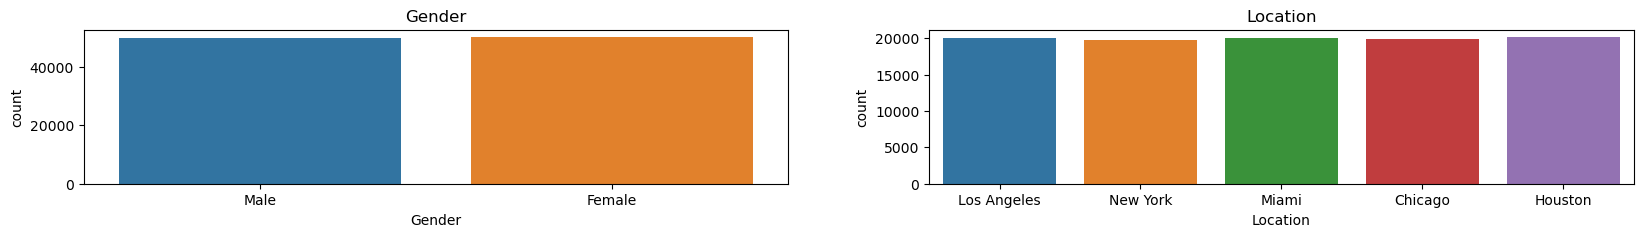

In [4]:
import seaborn as sns
cols = ['Gender','Location']
numerical = cols

plt.figure(figsize=(20,2))

for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i+1)
    sns.countplot(x=str(col), data=cs)
    ax.set_title(f"{col}")

<AxesSubplot:xlabel='Churn', ylabel='Monthly_Bill'>

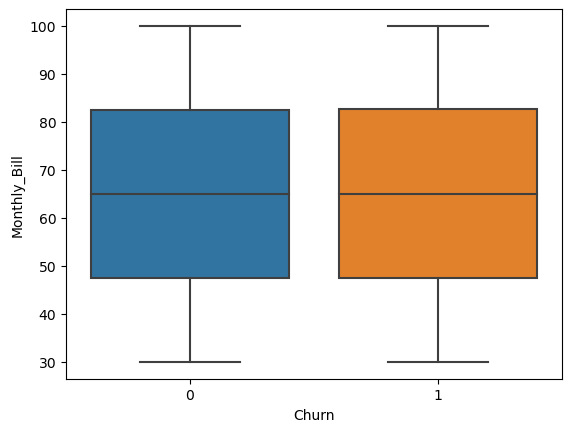

In [5]:
sns.boxplot(x='Churn', y='Monthly_Bill', data=cs)

<AxesSubplot:xlabel='Churn', ylabel='Subscription_Length_Months'>

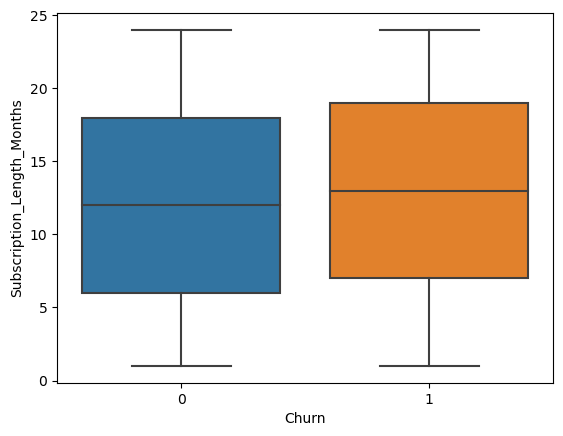

In [6]:
sns.boxplot(x='Churn', y='Subscription_Length_Months', data=cs)


<AxesSubplot:xlabel='Churn', ylabel='Total_Usage_GB'>

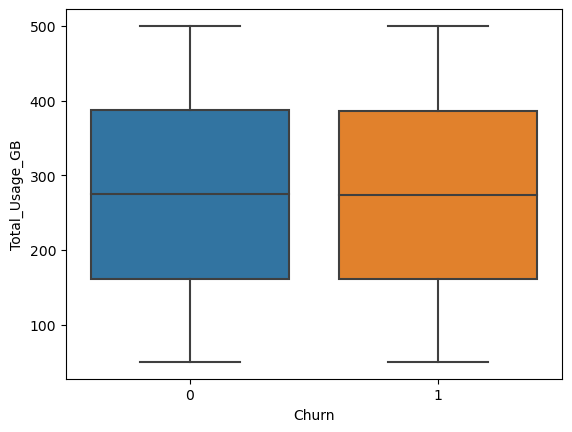

In [7]:
sns.boxplot(x='Churn', y='Total_Usage_GB', data=cs)

In [ ]:
sns.boxplot(x='Churn', y='Age', data=cs)

In [8]:
cf = cs.drop(['CustomerID','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB'],axis=1)

cf.head()

,Name,Age,Gender,Location,Churn
0,Customer_1,63,Male,Los Angeles,0
1,Customer_2,62,Female,New York,0
2,Customer_3,24,Female,Los Angeles,0
3,Customer_4,36,Female,Miami,1
4,Customer_5,46,Female,Miami,0


In [9]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
cff = cf.apply(le.fit_transform)
cff.head()

,Name,Age,Gender,Location,Churn
0,0,45,1,2,0
1,11112,44,0,4,0
2,22223,6,0,2,0
3,33334,18,0,3,1
4,44445,28,0,3,0


In [10]:
num_features = cs[['CustomerID','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']]
finaldf = pd.merge(num_features, cff, left_index=True, right_index=True)

In [11]:
finaldf

,CustomerID,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Name,Age,Gender,Location,Churn
0,1,17,73.36,236,0,45,1,2,0
1,2,1,48.76,172,11112,44,0,4,0
2,3,5,85.47,460,22223,6,0,2,0
3,4,3,97.94,297,33334,18,0,3,1
4,5,19,58.14,266,44445,28,0,3,0
...,...,...,...,...,...,...,...,...,...
99995,99996,23,55.13,226,99996,15,1,1,1
99996,99997,19,61.65,351,99997,44,0,4,0
99997,99998,17,96.11,251,99998,46,1,0,1
99998,99999,20,49.25,434,99999,33,0,4,1


In [12]:
finaldf.dropna()

,CustomerID,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Name,Age,Gender,Location,Churn
0,1,17,73.36,236,0,45,1,2,0
1,2,1,48.76,172,11112,44,0,4,0
2,3,5,85.47,460,22223,6,0,2,0
3,4,3,97.94,297,33334,18,0,3,1
4,5,19,58.14,266,44445,28,0,3,0
...,...,...,...,...,...,...,...,...,...
99995,99996,23,55.13,226,99996,15,1,1,1
99996,99997,19,61.65,351,99997,44,0,4,0
99997,99998,17,96.11,251,99998,46,1,0,1
99998,99999,20,49.25,434,99999,33,0,4,1


In [13]:
finaldf.drop(['Name'],axis=1)

,CustomerID,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Age,Gender,Location,Churn
0,1,17,73.36,236,45,1,2,0
1,2,1,48.76,172,44,0,4,0
2,3,5,85.47,460,6,0,2,0
3,4,3,97.94,297,18,0,3,1
4,5,19,58.14,266,28,0,3,0
...,...,...,...,...,...,...,...,...
99995,99996,23,55.13,226,15,1,1,1
99996,99997,19,61.65,351,44,0,4,0
99997,99998,17,96.11,251,46,1,0,1
99998,99999,20,49.25,434,33,0,4,1


In [14]:
x = finaldf.iloc[:, :-1].values
y = finaldf.iloc[:, -1].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 1)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
param_grid = {
    'max_depth': [None, 10, 20, 30],          
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4],           
    'criterion': ['gini', 'entropy']         
}


In [18]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [19]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1)
random_search.fit(x, y)
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'entropy'}


In [36]:
from sklearn.metrics import accuracy_score
clf1 = DecisionTreeClassifier(criterion="entropy",max_depth=10,min_samples_split= 5, min_samples_leaf= 1)
clf1 = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))


Accuracy: 0.5012121212121212


In [23]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

Best Model Accuracy: 0.5012727272727273
